# Before you begin


1.   Use the [Cloud Resource Manager](https://console.cloud.google.com/cloud-resource-manager) to Create a Cloud Platform project if you do not already have one.
2.   [Enable billing](https://support.google.com/cloud/answer/6293499#enable-billing) for the project.
3.   [Enable BigQuery](https://console.cloud.google.com/flows/enableapi?apiid=bigquery) APIs for the project.


### Provide your credentials to the runtime

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


# Use BigQuery via magics

The `google.cloud.bigquery` library also includes a magic command which runs a query and either displays the result or saves it to a variable as a `DataFrame`.

In [0]:
# Save output in a variable `df`

%%bigquery --project is843-demo df
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.samples.gsod`

In [4]:
df

,total_rows
0,114420316


In [0]:
%%bigquery --project is843-demo names

SELECT * FROM `bigquery-public-data.usa_names.usa_1910_current`
WHERE year > 1980

In [6]:
names.shape

(2998691, 5)

In [7]:
names.head()

,state,gender,year,name,number
0,OH,F,1981,Jennifer,3066
1,OH,F,1981,Jessica,2187
2,OH,F,1981,Amanda,2133
3,OH,F,1981,Sarah,1797
4,OH,F,1981,Melissa,1424


In [23]:
total_names = names.groupby(['name', 'gender']).agg({'number': 'sum'}).reset_index()
total_names.head()

,name,gender,number
0,Aaban,M,12
1,Aadan,M,23
2,Aadarsh,M,5
3,Aaden,M,4114
4,Aadhav,M,37


In [24]:
female_names = total_names[total_names['gender']=='F'].sort_values('number', ascending=False)
female_names.head()

,name,gender,number
12496,Jessica,F,846275
2737,Ashley,F,814754
8264,Emily,F,692820
22807,Sarah,F,638672
12306,Jennifer,F,608144


In [45]:
jess = names[names['name']=='Jessica'].groupby('year').agg({'number': 'sum'}).reset_index()
jess.head()

,year,number
0,1981,42644
1,1982,45569
2,1983,45430
3,1984,45970
4,1985,48511


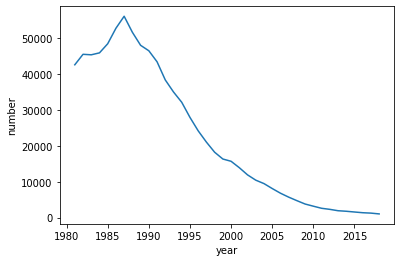

In [43]:
import seaborn as sns
sns.lineplot(x="year", y="number",
             data=jess)

For more info see [BigQuery documentation](https://cloud.google.com/bigquery/docs) and [library reference documentation](https://googlecloudplatform.github.io/google-cloud-python/latest/bigquery/usage.html).